In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import string 
import textmining
import re 
import seaborn as sns

In [5]:
df_train = pd.read_csv('house/train_toxic.csv')
df_test = pd.read_csv('house/test_toxic.csv')

In [6]:
df_fulldata = [df_train, df_test]

In [7]:
#check data 
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [15]:
# check missing value 

for i in df_fulldata :
    print  ('Missing data in database '  )
    i.isnull().sum()

Missing data in database 
Missing data in database 


In [16]:
#check  out put column 

output_col = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

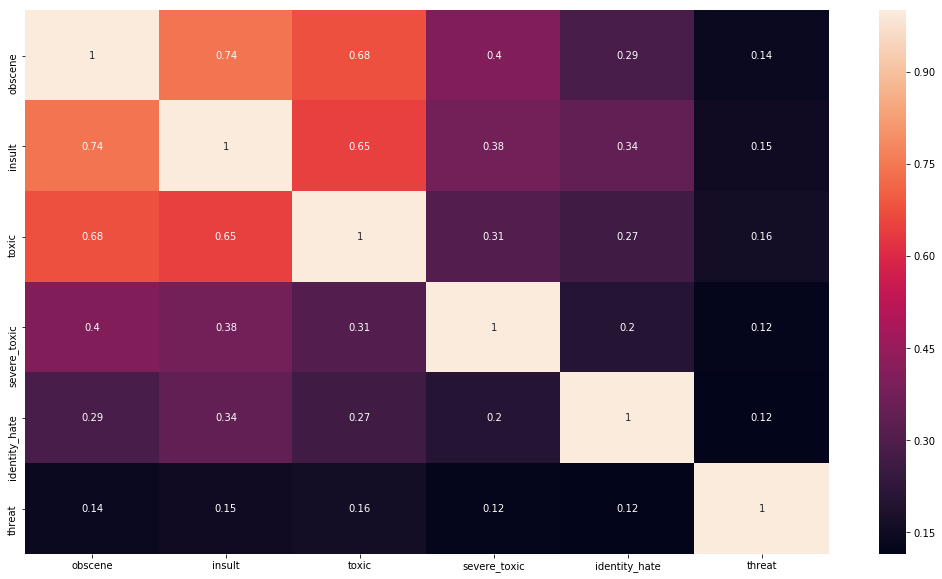

In [23]:
f, ax = plt.subplots(figsize = (18,10))
sns.heatmap(df_train[output_col].corr(), ax=ax,annot=True)

In [25]:
#check length of comment
df_train['char_length'] = df_train['comment_text'].apply(lambda x: len(str(x)))

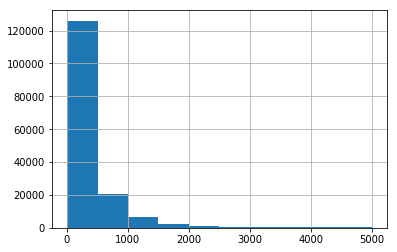

In [26]:
df_train['char_length'].hist()

In [27]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [28]:
#clen data 
for i in df_fulldata :
    i['comment_text'] = i['comment_text'].map(lambda com : clean_text(com))

In [30]:
train_df = df_train.drop('char_length',axis=1)

In [31]:
train_X = df_train.comment_text
test_X = df_test.comment_text

In [33]:
test_X

0         yo bitch ja rule is more succesful then you wi...
1                   from rfc the title is fine as it is imo
2                            sources zawe ashton on lapland
3         if you have a look back at the source the info...
4                 i do not anonymously edit articles at all
5         thank you for understanding i think very highl...
6         please do not add nonsense to wikipedia such e...
7                            dear god this site is horrible
8         only a fool can believe in such numbers the co...
9         double redirects when fixing double redirects ...
10        i think its crap that the link to roggenbier i...
11        somebody will invariably try to add religion r...
12        25 february 2010 utc looking it over it clear ...
13        it says it right there that it is a type the t...
14        before adding a new product to the list make s...
15        current position anyone have confirmation that...
16                                 this 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [36]:
# use training data  use it to create a document-term matrix
Train_dtm = vect.fit_transform(train_X)
# examine the document-term matrix created from Train_dtm
Train_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [37]:
# use test data  use it to create a document-term matrix
Test_dtm = vect.fit_transform(test_X)
# examine the document-term matrix created from Train_dtm
Test_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2624463 stored elements in Compressed Sparse Row format>

In [40]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

# create submission file
submission_binary = pd.read_csv('house/sample_submission.csv')

for label in output_col:
    print('... Processing {}'.format(label))
    y = df_train[label]
    # train the model using X_dtm & y
    logreg.fit(Train_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(Train_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(Test_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing obscene
Training accuracy is 0.9832300355327722
... Processing insult
Training accuracy is 0.9755469352200588
... Processing toxic
Training accuracy is 0.9639846839337975
... Processing severe_toxic
Training accuracy is 0.9920662275726793
... Processing identity_hate
Training accuracy is 0.9939713356436947
... Processing threat
Training accuracy is 0.9981199591404453


In [41]:
submission_binary.to_csv('submission_binary_nem1.csv',index=False)

In [44]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

In [ ]:
decision_tree = DecisionTreeClassifier()
submission_DT = pd.read_csv('house/sample_submission.csv')
for label in output_col:
    print('... Processing {}'.format(label))
    y = df_train[label]
    decision_tree.fit(Train_dtm, y)
    Y_pred = decision_tree.predict(Train_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, Y_pred)))
    test_y_prob = decision_tree.predict_proba(Test_dtm)[:,1]
    submission_DT[label] = test_y_prob

... Processing obscene
Training accuracy is 0.9987341058212332
... Processing insult
Training accuracy is 0.9980008898860069
... Processing toxic


In [ ]:
linear_svc = LinearSVC()
for label in output_col:
    print('... Processing {}'.format(label))
    y = df_train[label]
    linear_svc.fit(Train_dtm, y)
    Y_pred = linear_svc.predict(Train_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, Y_pred)))